# Capstone Project - Health Insurance Claims

## <font color='darkblue'>**Project Scenario and Problem Statement:**</font>

### <font color='black'><strong>**A Health Insurance Company seeking to enhance its risk assessment and pricing strategy by improving how it predicts claim costs. The current approach risks underpricing high-risk individuals (leading to losses) or overpricing low-risk ones.**</font>

## <font color='darkblue'>**Objectives:**</font>

### <font color='black'><strong>My goal is to help the insurance company to identify key drivers of high insurance claims and build a predictive model to estimate claim amounts. This will enable smarter pricing decisions, with findings presented to management and the pricing team to inform premiums, risk assessment, and targeted interventions. </font>

## <font color='darkblue'>**Dataset Info:**</font>

In [53]:
file_path = r"C:\Users\USER\Desktop\Course\Capstone\TKL\Dataset_Info.txt"

with open(file_path, 'r') as file:
    content = file.read()

print(content)

        Dataset Info

Dataset Source:
https://github.com/Tayleong/Health-Insurance-Claims/blob/main/Predicting%20Medical%20Insurance%20Claims.ipynb

Description:
This dataset contains health insurance claims information. It includes demographic data 
(age, gender, and region), lifestyle and health indicators (diabetic, bmi and smoker status), 
and claim amounts. The dataset can be used to predict medical insurance claims and 
analyze patterns in healthcare costs.

Data Dictionary:

Column Name     | Data Type | Description
----------------|-----------|-----------------------------------------------
PatientID       | int       | Unique identifier for each patient
age             | int       | Age of the patient in years
gender          | string    | Gender of the patient (Male/Female)
bmi             | float     | Body Mass Index of the patient
children        | int       | Number of children/dependents
smoker          | string    | Smoker status (Yes/No)
region          | string    | R

## <font color='blue'><strong>Table of Content

### <font color='black'><strong>Part 1. Exploratory Data Analysis (EDA) 

1. Import Libraries

2. Load and Understand Data

3. Data Quality Assessment

4. Target Variable Analysis

5. Data Cleaning

6. Descriptive Statistics

7. Outlier Detection

8. Univariate Analysis

9. Target Relationships - Target variable is 'claim'

10. Correlation Analysis

11. Advanced Analysis (FEATURE ENGINEERING)

12. SUMMARY OF EDA FINDINGS


### <font color='black'><strong>Part 2. Modeling with Linear Regression, Random Forest Regression and Gradient Boosting Regression 

13. IMPORTS ESSENTIAL TOOLS AND PREPARATION FOR MODELING

14. Linear Regression

15. Random Forest Regression

16. Gradient Boosting Regression

17. Models Comparison

18. SUMMARY OF MODELING FINDINGS - GRADIENT BOOSTING (Best Performer)
    
19. OVERALL SUMMARY
    
20. KEY INSIGHTS
    
21. RECOMMENDATION
    
22. OTHERS COMMENTS

## Part 1. Exploratory Data Analysis (EDA)

### 1. Import Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings('ignore')

#### <font color='darkblue'>**The libraries used for this program were:-**</font>

<font color='darkblue'>1) Numpy to carry out numerical calculations,
    
<font color='darkblue'>2) Pandas to create and maintain dataframes,
    
<font color='darkblue'>3) Matplotlib to visualise the data,
    
<font color='darkblue'>4) Seaborn to visualise the data at a higher level, and

<font color='darkblue'>5) Sklearn to carry out machine learning operation
    
<font color='darkblue'>6) sklearn.linear_model to carry basic regression model to predict continuous outcomes
    
<font color='darkblue'>7) sklearn.ensemble for modeling multiple decision trees for more accurate regression predictions.
    
<font color='darkblue'>8) sklearn.metrics to carry out evaluation for regression model performance (MSE: Penalizes large errors, MAE: Measures average error, R²: Explains variance)

<font color='darkblue'>9) sklearn.preprocessing to converts categorical labels into numeric form (LabelEncoder: 'Yes' → 1, 'No' → 0 / StandardScaler: Standardizes numeric features by removing the mean and scaling to unit variance).

### 2. Load and Understand Data

In [20]:
df = pd.read_csv(r"C:\Users\USER\Desktop\Course\Capstone\Original_insurance_data.csv", header=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [4]:
df.columns

Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'children', 'smoker', 'region', 'claim'],
      dtype='object')

In [5]:
df.shape

(1340, 11)

In [6]:
df.head(10)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
5,5,6,NaN,male,34.4,96,Yes,0,No,northwest,1137.47
6,6,7,NaN,male,37.3,86,Yes,0,No,northwest,1141.45
7,7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46


### <font color='darkblue'> **Observation:**</font>
<font color='darkblue'>1) The dataset contains 11 columns (features) and 1,340 rows, with some missing values in Age and Region. 
    
<font color='darkblue'>2) Data types include a mix of integers, floats, and objects. Categorical features (object type) will need to be converted for modeling using techniques such as count encoding, label encoding, or one-hot encoding.

<font color='darkblue'>3) Of the 11 features, four are categorical (Gender, Diabetic, Smoker, and Region), while remaining seven are numerical. 
    
<font color='darkblue'>4) Among the numerical features, Index and PatientID are identifiers and should be excluded from modeling and analysis.

In [7]:
#Checking the number of unique values in each column and separate categorical and continuous data
#For integers,use a cut off (e.g., >10 unique values) to distinguish a true continuous feature (like age or BMI) from a categorical feature that happens to be represented by numbers like "children

continuous_cols = []
non_continuous_cols = []

#Getting the name of each column in the DataFrame.
##Check is to see if the data type of the column is numeric (e.g., int64, float64).
#counts the number of unique values in the column.

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]): 
        unique_vals = df[col].nunique()       
        if pd.api.types.is_float_dtype(df[col]) or unique_vals > 10: 
            continuous_cols.append(col)
        else:
            non_continuous_cols.append(col)
    else:
        non_continuous_cols.append(col)

print("\n=== CONTINUOUS FEATURES ===")
print(continuous_cols)

print("\n=== NON-CONTINUOUS FEATURES ===")
print(non_continuous_cols)

dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()


=== CONTINUOUS FEATURES ===
['index', 'PatientID', 'age', 'bmi', 'bloodpressure', 'claim']

=== NON-CONTINUOUS FEATURES ===
['gender', 'diabetic', 'children', 'smoker', 'region']


,unique count
index,1340
PatientID,1340
age,43
gender,2
bmi,275
bloodpressure,61
diabetic,2
children,6
smoker,2
region,4


<font color='darkblue'>Note:
    
<font color='darkblue'>1) Understanding the type of variable (continuous vs non-continuous) is essential in data analysis, modeling and visualization. 

<font color='darkblue'>2) For integers, we use a cut off (e.g., >10 unique values) to distinguish a true continuous feature (like age or BMI) from a categorical feature that happens to be represented by numbers like "children.
    
<font color='darkblue'>3) Integer variables with over 10 unique values are typically treated as continuous. Those with fewer values (e.g., 'children') are categorical or discrete, representing countable groupings rather than continuous measures.

### 3. Data Quality Assessment

In [8]:
print("\n=== MISSING VALUES ===")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

print("\n=== DATA TYPES ===")
print(df.dtypes)


=== MISSING VALUES ===
age       5
region    3
dtype: int64

=== DATA TYPES ===
index              int64
PatientID          int64
age              float64
gender            object
bmi              float64
bloodpressure      int64
diabetic          object
children           int64
smoker            object
region            object
claim            float64
dtype: object


### <font color='darkblue'> **Observation:**</font>
<font color='darkblue'>1) Age has 5 missing values
    
<font color='darkblue'>2) Region has 2 missing values
    
<font color='darkblue'>3) All data types are appropriately assigned
    
<font color='darkblue'>4) Minimal missing values, suggests good data quality

### 4. Target Variable Analysis

### <font color='darkblue'> **Our target variable is 'claim' - the insurance claim amount.**</font>

In [9]:
target = 'claim'
print(f"\n=== TARGET VARIABLE: {target.upper()} ===")
print(f"Range: ${df[target].min():,.2f} to ${df[target].max():,.2f}")
print(f"Mean: ${df[target].mean():,.2f}")
print(f"Median: ${df[target].median():,.2f}")


=== TARGET VARIABLE: CLAIM ===
Range: $1,121.87 to $63,770.43
Mean: $13,252.75
Median: $9,369.61


### <font color='darkblue'> **Observation:**</font>
<font color='darkblue'>1) Healthcare claims in this dataset vary widely. This broad spectrum immediately signals significant variability in healthcare costs.

<font color='darkblue'>2) The mean claim is notably higher than the median. This difference is an indicator of a right-skewed distribution, meaning there are likely a few very high claims pulling the average up.

### 5. DATA CLEANING

In [21]:
# Rename the column
df = df.rename(columns={'children': 'Patient Dependant_Children'})

# Verify the change
print(df.columns)  # Now includes 'Patient Dependant_Children'

Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'Patient Dependant_Children', 'smoker', 'region', 'claim'],
      dtype='object')


In [22]:
# Handle missing values
df['age'].fillna(df['age'].median(), inplace=True)  # Numerical imputation
df['region'].fillna(df['region'].mode()[0], inplace=True)  # Categorical imputation

# Convert binary columns to categorical
binary_cols = ['diabetic', 'smoker']
df[binary_cols] = df[binary_cols].apply(lambda x: x.astype('category'))

# Verify no missing values remain
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
index                         0
PatientID                     0
age                           0
gender                        0
bmi                           0
bloodpressure                 0
diabetic                      0
Patient Dependant_Children    0
smoker                        0
region                        0
claim                         0
dtype: int64


<font color='darkblue'>Note:
    
<font color='darkblue'>1) Used median for age (robust to outliers)
    
<font color='darkblue'>2) Used mode for region (most frequent category)
    
<font color='darkblue'>3) Converted binary features to categorical for efficient analysis
    
<font color='darkblue'>4) As a result of these imputation, there are no missing values remaining in the dataset.
    
<font color='darkblue'>5) Change column "Children" to "Patient Dependant (Children)" for better interpretion.

### 6. DESCRIPTIVE STATISTICS

In [12]:
# Summary statistics for numerical columns
df.describe()

,index,PatientID,age,bmi,bloodpressure,Patient Dependant_Children,claim
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078358,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.082176,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


### <font color='darkblue'> **Observation:**</font>
<font color='darkblue'>1) Age: Patients range from 18-60 years (mean 38.1)
    
<font color='darkblue'>2) BMI: Mean is around 31 (overweight) / Median BMI is around 30 (overweight).
    
<font color='darkblue'>3) Blood Pressure: Mean is around 94 (Normal range) / Median is around 92 (Normal range)
    
<font color='darkblue'>4) Patient Dependant-Children: Most patients have 0 to 2 children (75th percentile).
    
<font color='darkblue'>5) Charges: Highly skewed distribution, with a mean of ~13,000 but a max of ~63,000, suggesting outliers.

### 7. OUTLIER DETECTION

In [13]:
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]

print("\n=== OUTLIER COUNTS ===")
for col in ['age', 'bmi', 'bloodpressure', 'claim']:
    outliers = detect_outliers(col)
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")


=== OUTLIER COUNTS ===
age: 0 outliers (0.0%)
bmi: 9 outliers (0.7%)
bloodpressure: 62 outliers (4.6%)
claim: 141 outliers (10.5%)


### <font color='darkblue'> **Observation:**</font>
<font color='darkblue'>1) Claims: Most skewed column, with over 10% of entries considered outliers.
    
<font color='darkblue'>2) Bloodpressure: Nearly 5% of patients show abnormal blood pressure readings.
    
<font color='darkblue'>3) BMI: Small number of patients (less than 1%) have BMI values significantly outside the range.They are likely to be extremely high BMIs (morbid obesity) or possibly very low (underweight).
    
<font color='darkblue'>4) Diabetic: With 642 patients marked as diabetic (~48%), this indicates that almost half of the population in the dataset is living with diabetes. This suggest that diabetes is a major health factor in this dataset and highly potential to affect the claim impact.

### 8. UNIVARIATE ANALYSIS

<font color='darkblue'>Univariate analysis refers to the analysis of one variable. <mark>The purpose of univariate analysis is to understand the distribution of values for a single variable.<mark>

<font color='darkblue'>Univariate analysis is to create charts to visualize the distribution of values for a certain variable.

### <font color='blue'> **Categorical Feature Distributions**</font>

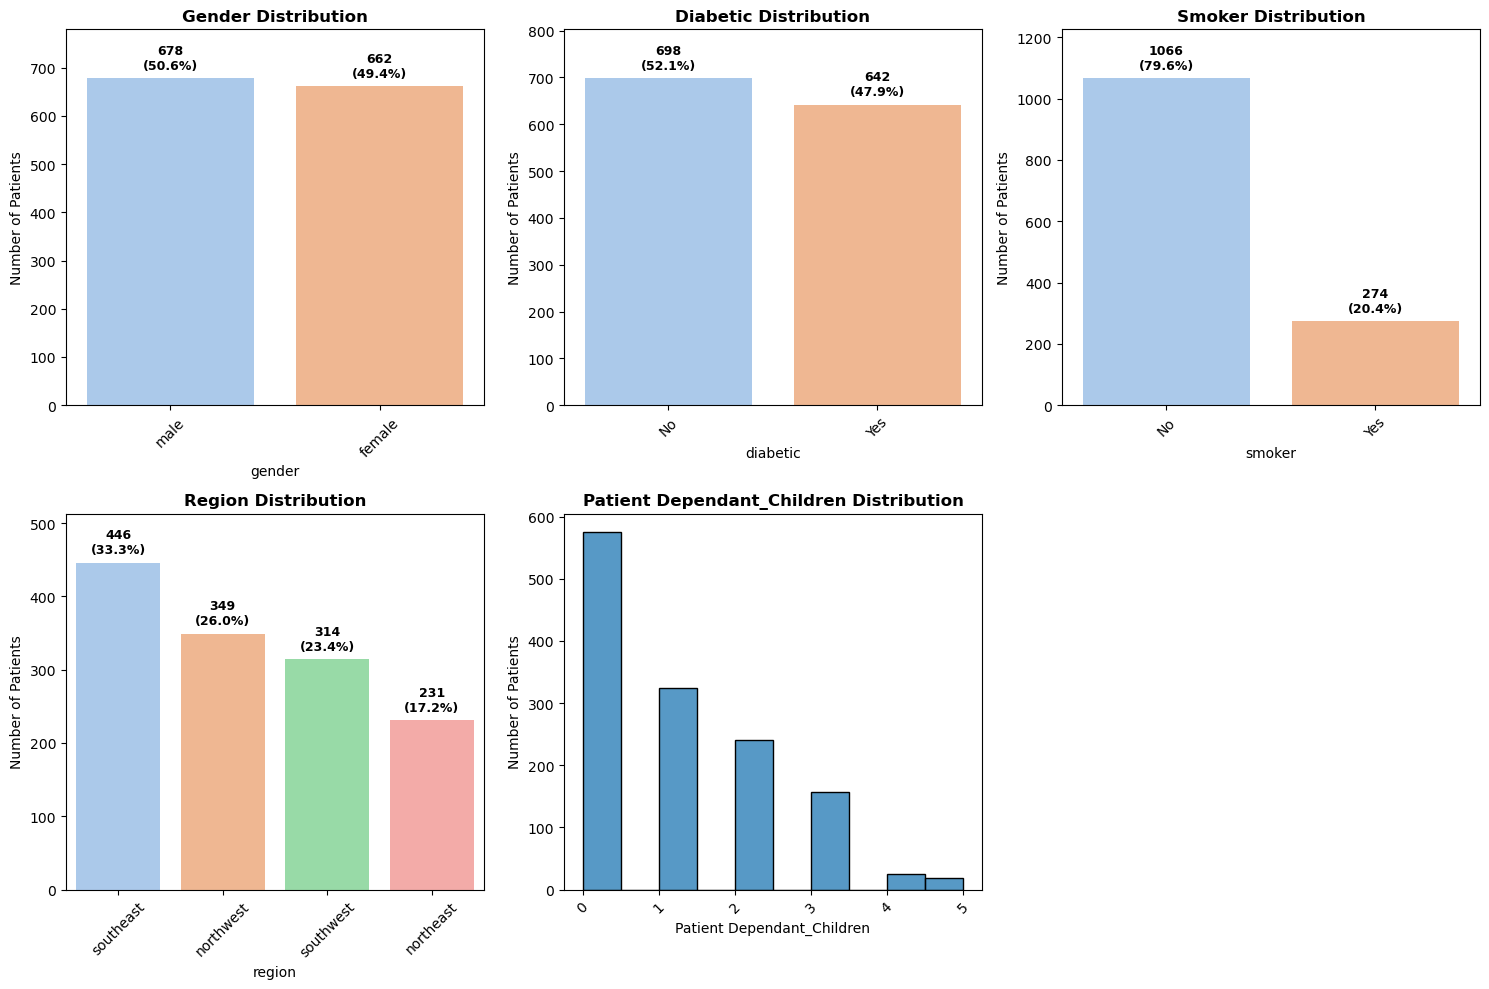

In [14]:
cat_cols = ['gender', 'diabetic', 'smoker', 'region', 'Patient Dependant_Children']
total_patients = len(df)

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    
    if df[col].nunique() > 5:
        sns.histplot(df[col], bins=10)
        plt.ylabel("Number of Patients")
    else:
        ax = sns.countplot(data=df, x=col, palette='pastel')
        ax.set_ylabel("Number of Patients")

        # Find max height for y-limit adjustment
        max_height = max([p.get_height() for p in ax.patches])
        ax.set_ylim(0, max_height * 1.15)  # Add 15% headroom

        # Add annotations
        for p in ax.patches:
            height = p.get_height()
            percentage = f"{(height / total_patients * 100):.1f}%"
            ax.text(p.get_x() + p.get_width() / 2,
                    height + max_height * 0.02,  # 2% spacing
                    f'{int(height)}\n({percentage})',
                    ha='center',
                    va='bottom',
                    fontsize=9,
                    fontweight='bold')

    # Custom chart title
    if col == 'children':
        plt.title('Children Distribution', weight='bold')
    else:
        plt.title(f'{col.title()} Distribution', weight='bold')

    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### <font color='darkblue'> **Observation:**</font>
<font color='darkblue'>1) Gender: Distribution is nearly equal between male and female patients.
    
<font color='darkblue'>2) Smoker: Roughly 20–25% of patients are smokers.
    
<font color='darkblue'>3) Region: Southeast has the most patients. 
    
<font color='darkblue'>4) Diabetic: With 642 patients marked as diabetic (~48%), this indicates that almost half of the population in the dataset is living with diabetes. This suggest that diabetes is a major health factor in this dataset.
    
<font color='darkblue'>5) Patient Dependant_Children: Majority of patients have 0 to 2 children and few patients report have 4 or more children.

### <font color='blue'> **Nurmerical Feature Distributions**</font>

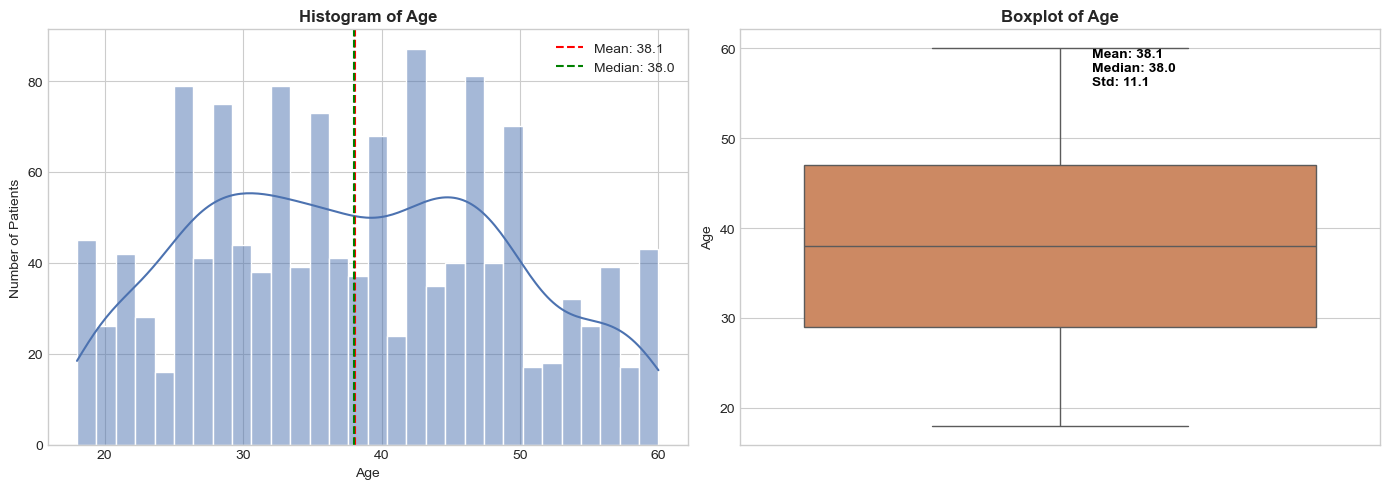

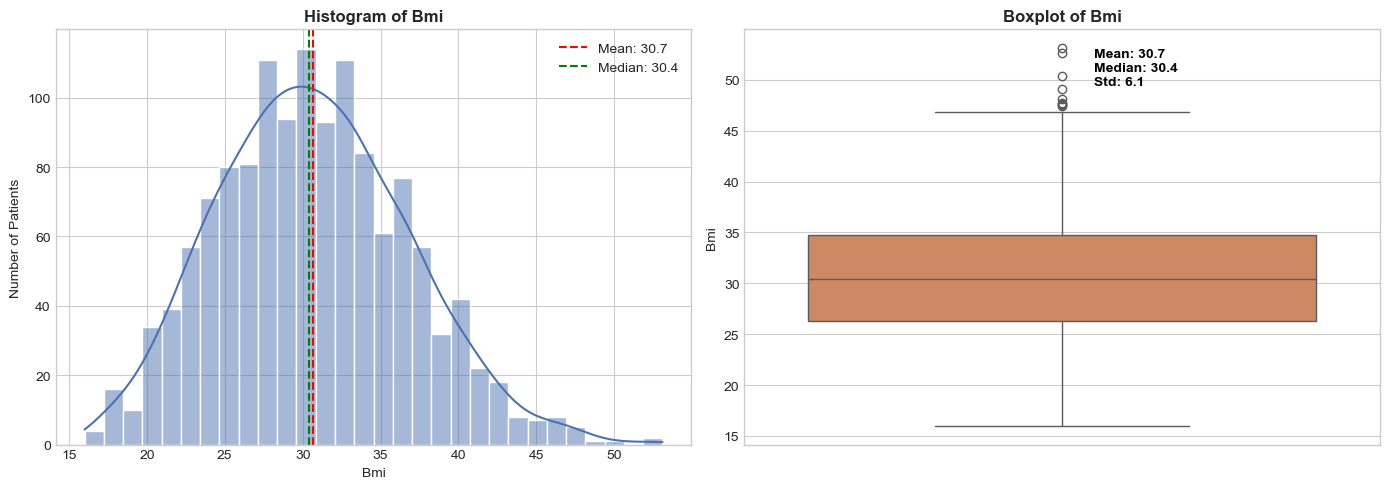

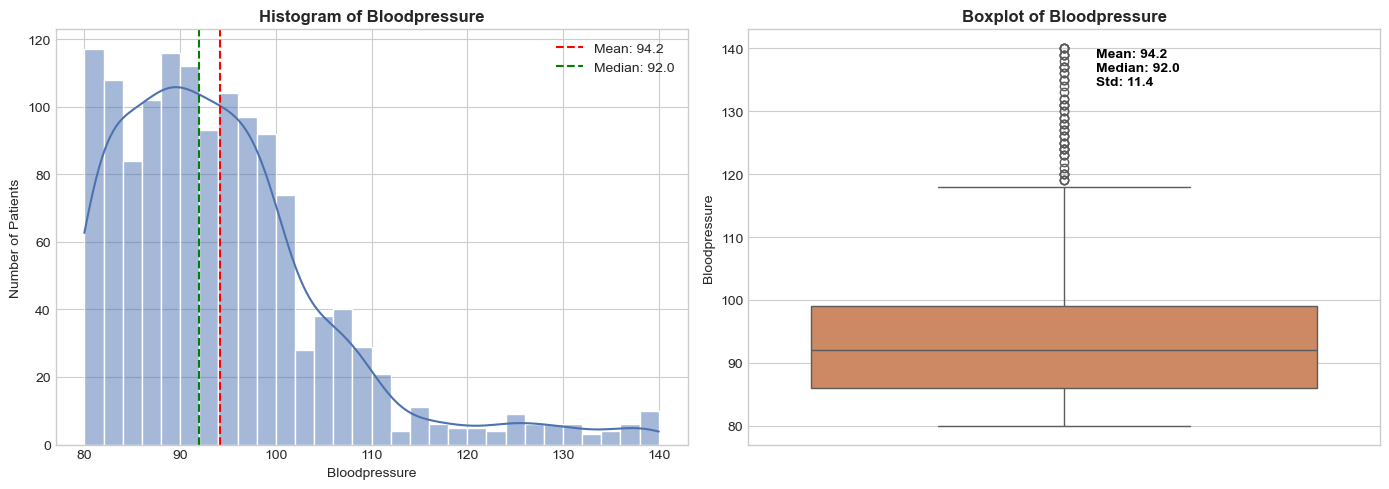

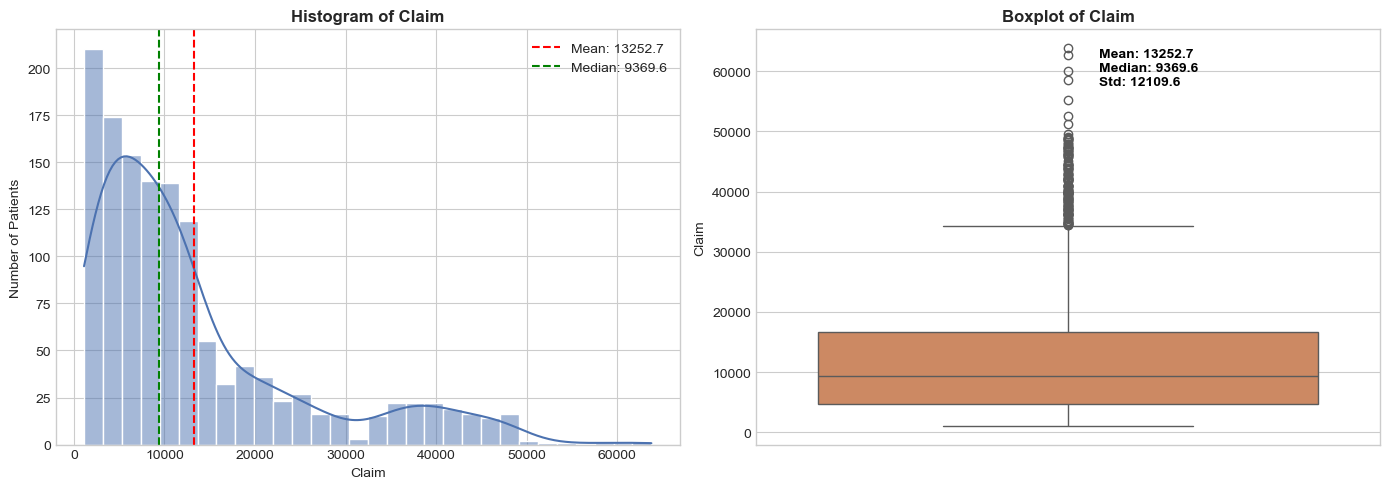

In [15]:

num_cols = ['age', 'bmi', 'bloodpressure', 'claim']
plt.style.use('seaborn-v0_8-whitegrid')

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram (Patient Count)
    sns.histplot(df[col], bins=30, kde=True, ax=axes[0], color='#4c72b0', edgecolor='white')
    axes[0].set_title(f'Histogram of {col.capitalize()}', fontsize=12, weight='bold')
    axes[0].set_xlabel(f'{col.capitalize()}', fontsize=10)
    axes[0].set_ylabel('Number of Patients', fontsize=10)  # ✅ Updated y-axis label

    # Summary statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()

    # Add vertical lines for mean and median
    axes[0].axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.1f}')
    axes[0].axvline(median_val, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_val:.1f}')
    axes[0].legend()

    # Boxplot
    sns.boxplot(y=df[col], ax=axes[1], color='#dd8452')
    axes[1].set_title(f'Boxplot of {col.capitalize()}', fontsize=12, weight='bold')
    axes[1].set_ylabel(f'{col.capitalize()}', fontsize=10)

    # Annotate boxplot with stats
    axes[1].text(0.05, df[col].max(), 
                 f"Mean: {mean_val:.1f}\nMedian: {median_val:.1f}\nStd: {std_val:.1f}",
                 fontsize=10, color='black', ha='left', va='top', weight='bold')

    plt.tight_layout()
    plt.show()

## <font color='darkblue'> **Observation:**</font> 

### <font color='darkblue'> **1) Age**</font>

1. Histogram generally shows uniform distribution

2. Boxplot shows no outliers.

<font color='darkblue'>Stats:

Mean ≈ 39, Median ≈ 38, Std ≈ 14
    
### <font color='darkblue'> **2) BMI (Body Mass Index)**</font>

1. Distribution is slightly right-skewed with a concentration between 25 and 35.

2. Some outliers above BMI 45.

<font color='darkblue'>Stats:

Mean ≈ 31, Median ≈ 30.3, Std ≈ 6.0

Average BMI is in the overweight to obese range.
    
### <font color='darkblue'> **3) Bloodpressure**</font>

1. Appears normally distributed, centered around 90–95.

2. Boxplot reveals multiple outliers on the higher end (possibly hypertension).

<font color='darkblue'>Stats:

Mean ≈ 94, Median ≈ 92, Std ≈ 11

A healthy average, however outliers may warrant attention.
    
### <font color='darkblue'> **4) Claim (Insurance Claim Amount)**</font>

1. Highly right-skewed distribution. Majority of claims are low, but long tail of high values.

2. Boxplot shows many extreme outliers.

<font color='darkblue'>Stats:

Mean ≈ 13,200, Median ≈ 9,300, Std ≈ 12,100

Mean is much higher than median, indicating presence of high-value claims pulling the average up. Refer to Boxplot visualisation extreme outliers of high-value claims. 


### 9. TARGET  RELATIONSHIPS - Target variable is 'claim' 

### <font color='darkblue'> **Numerical and Categorical features vs claims**</font>

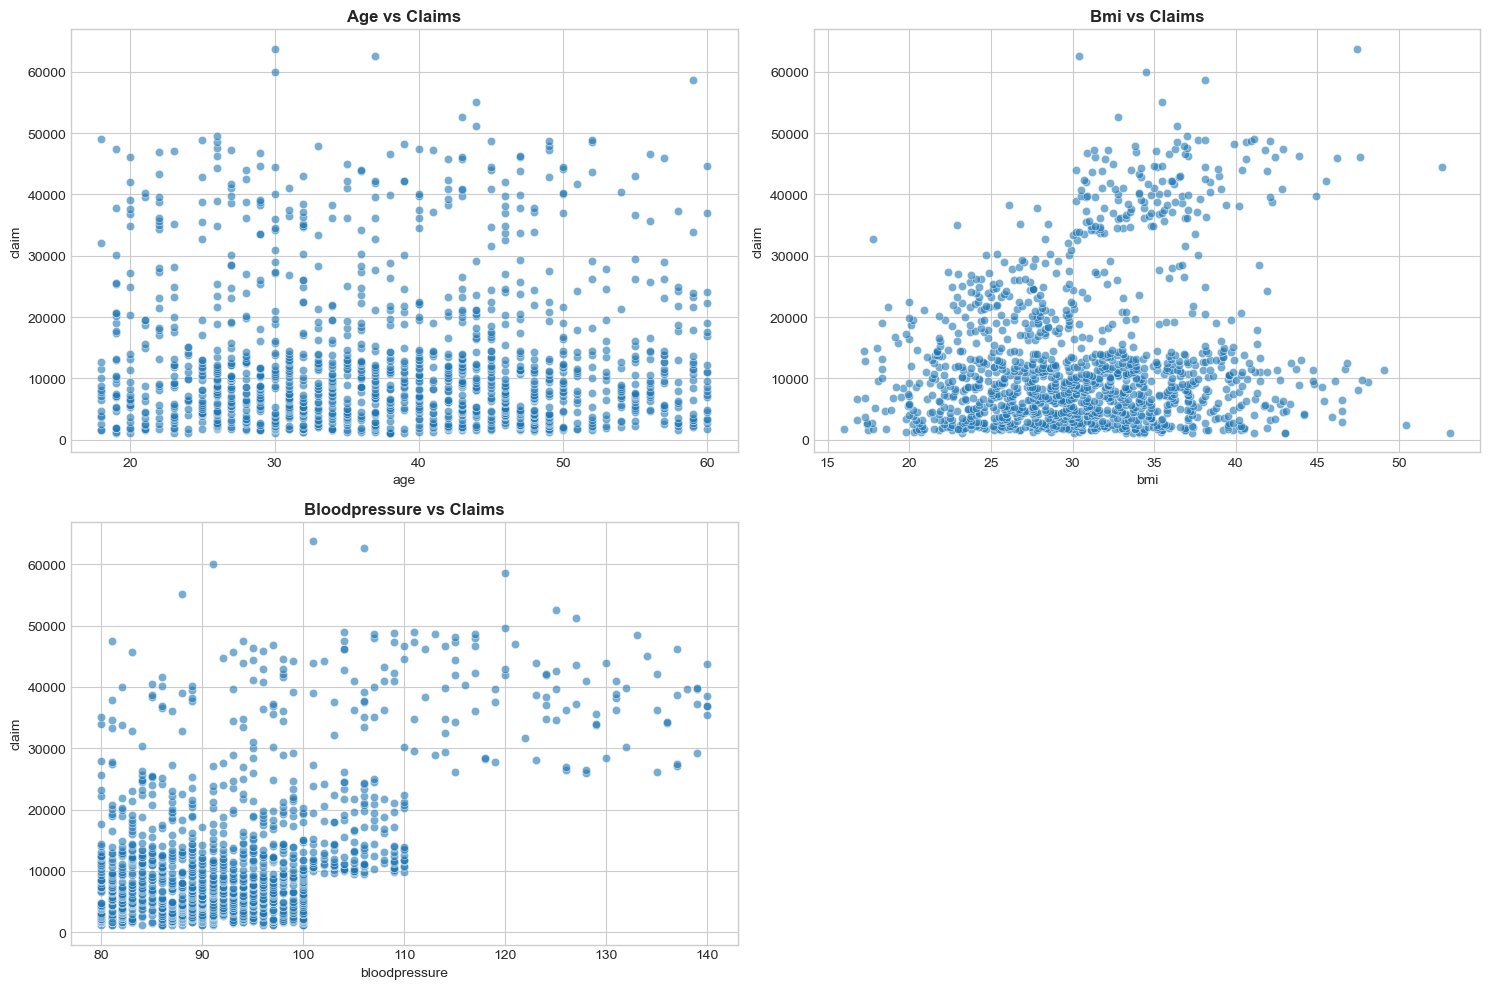

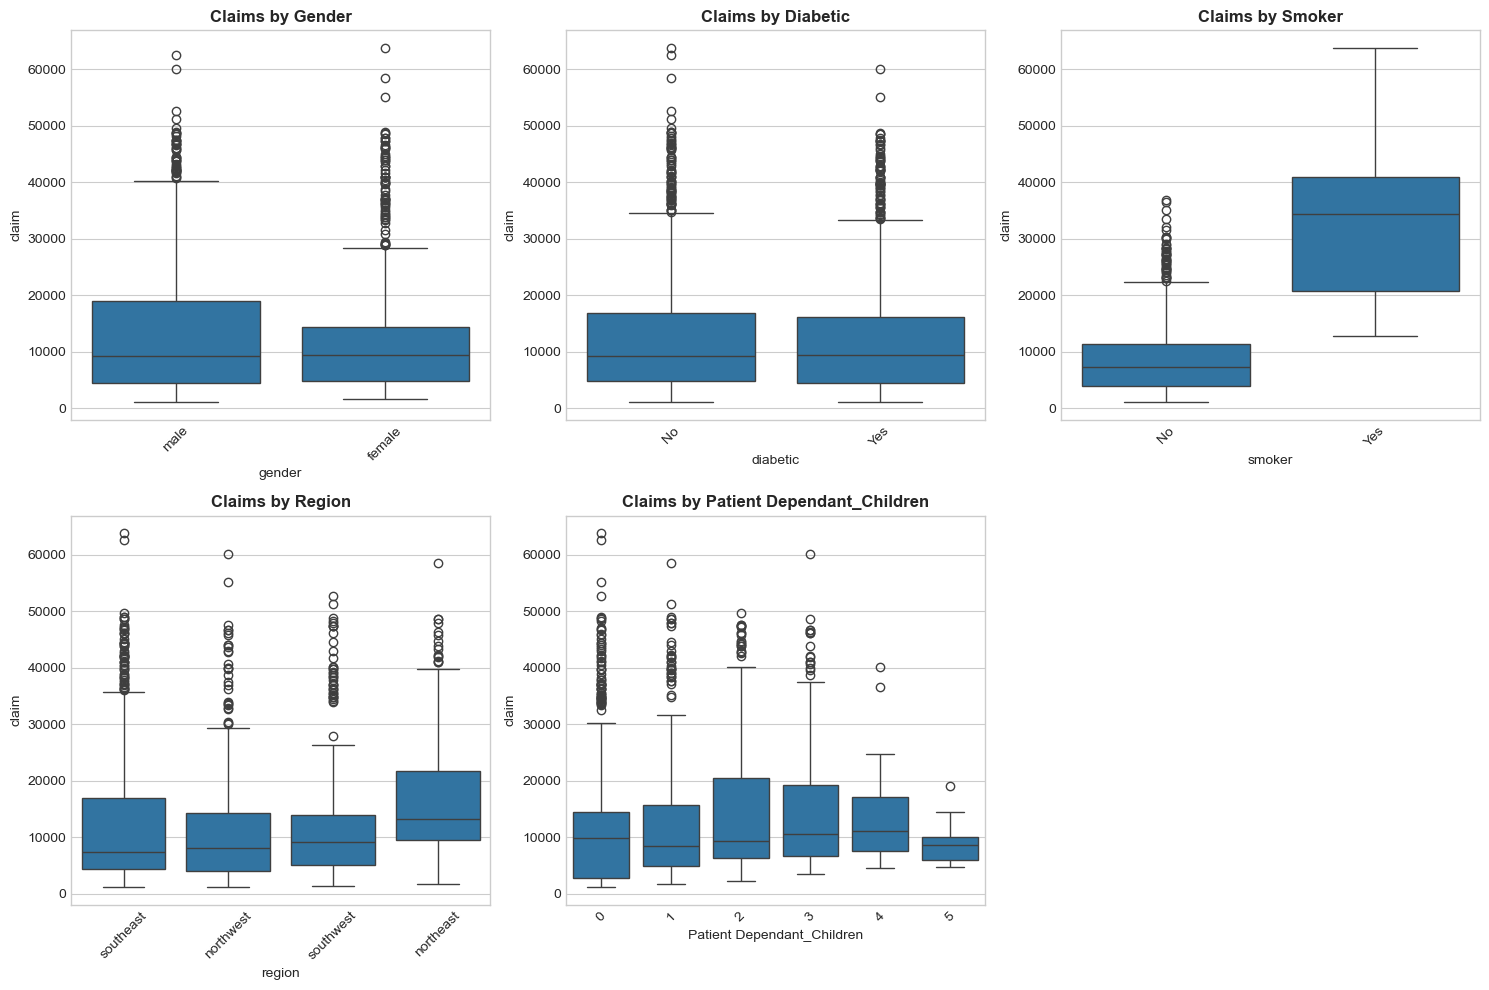

In [16]:
# Numerical features vs claims
#Visualizes continuous variables (age, bmi, bloodpressure, children) against the insurance claim to spot patterns or trends.
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols[:-1], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=col, y=target, alpha=0.6)
    plt.title(f'{col.title()} vs Claims', weight='bold')
plt.tight_layout()
plt.show()

# Visualizes Non-continuous variables features vs claims
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col, y=target)
    plt.title(f'Claims by {col.title()}', weight='bold')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### <font color='darkblue'> **Observation for Numerical Features vs. Claim:**</font>

<font color='darkblue'>1) Age: Claim values are widely scattered across all age groups and no strong linear trend between age and claim amount.
    
<font color='darkblue'>2) BMI: Claims trend up at around BMI 30 onwards. This suggest that obesity may be linked to higher insurance claims.
    
<font color='darkblue'>3) Bloodpressure: Large cluster of claims lies between blood pressure 80 to 100, with most claims below $15,000. Claim distribution becomes lesser as blood pressure increases beyond 110, but high claims still appear.	

### <font color='darkblue'> **Observation for  Categorical Features vs. Claim:**</font>

<font color='darkblue'>1) Gender: Both male and female genders show similar median claim amounts.There are numerous outliers for both genders, with some claims reaching over 600,000. 
    
<font color='darkblue'>2) Diabetic: The median claim amounts and IQRs for both non-diabetic and diabetic are very similar. Both groups also exhibit a substantial number of high-value outliers
    
<font color='darkblue'>3) Smoker:	Smokers have much higher median and max claims than non-smokers. This suggest that smoking is a major factor that leads to significantly higher claims than the rest.
    
<font color='darkblue'>4) Region: The median claim amounts across all four regions appear relatively similar. The IQRs are also comparable across regions. All regions show numerous high-value outliers. The "northeast" region seems to have a slightly higher median but the difference is not dramatic.

<font color='darkblue'>5) Median claim amounts decline slightly as Patient Dependant_Children increases but the difference is not significant. However all groups show many high outliers, especially with fewer children.

### 10. CORRELATION ANALYSIS

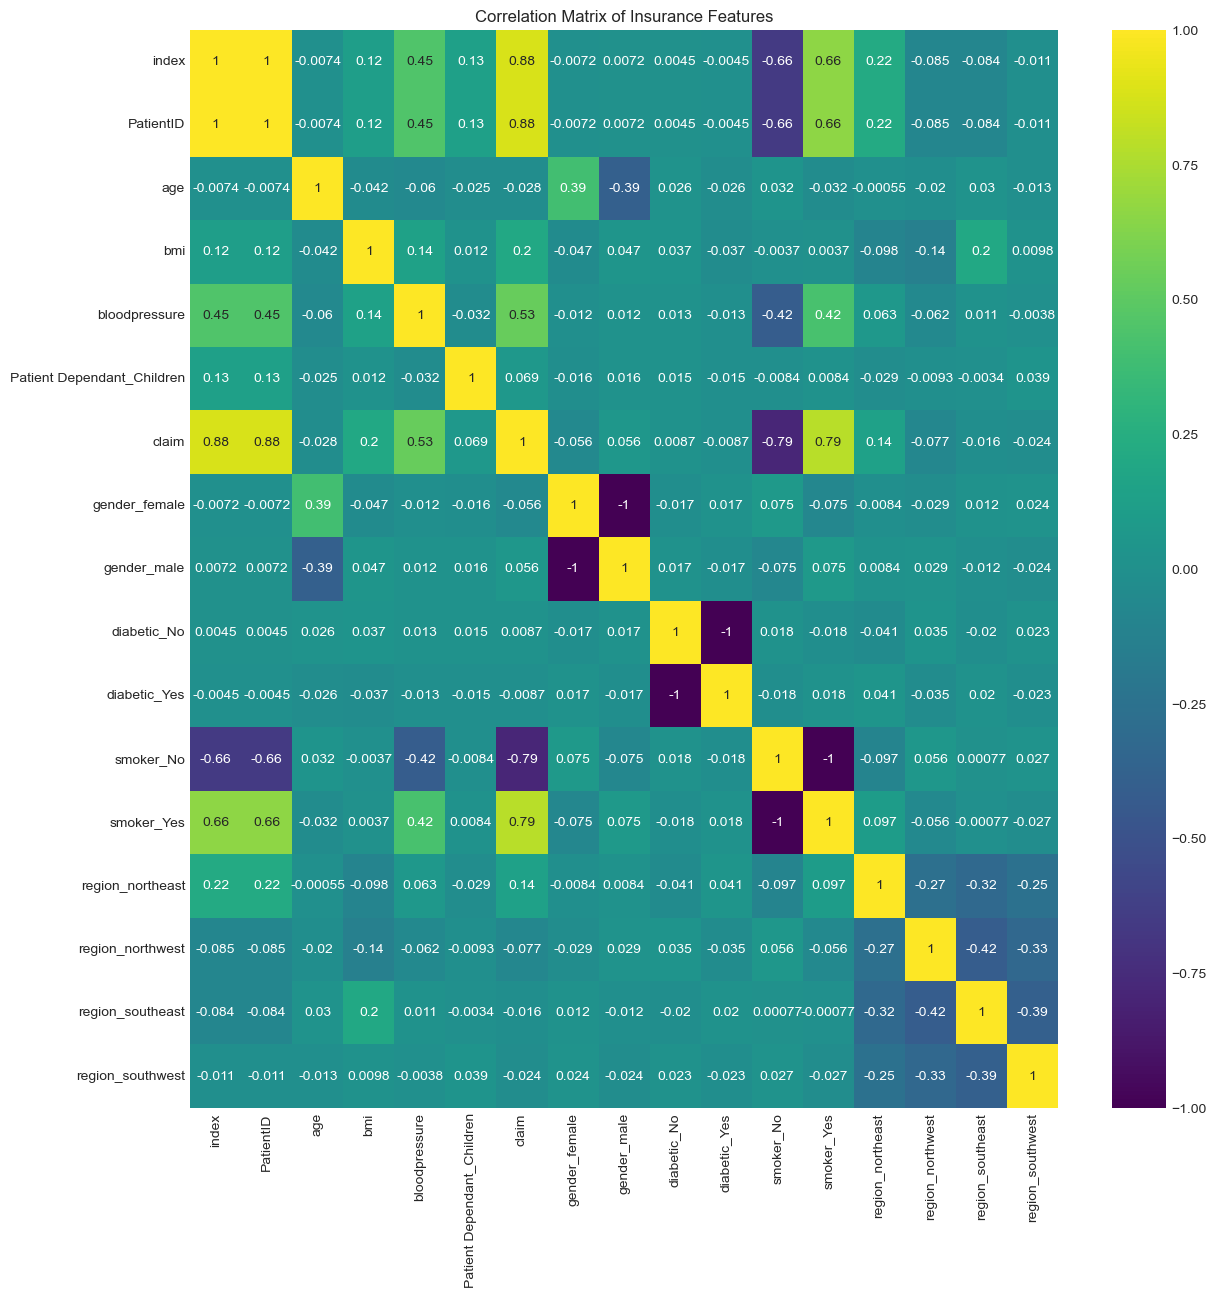

In [17]:
#Converts all categorical variables into one-hot encoded columns.
#Example, a column gender with values male and female becomes two columns: gender_male, gender_female
#For example, a column gender with values male and female becomes two columns: gender_male, gender_female.
df = pd.get_dummies(df)

#example, a column gender with values male and female becomes two columns: gender_male, gender_female.
#This gives insight into linear relationships between features.
correl = df.corr(numeric_only=True)
plt.figure(figsize=(14,14))
sns.heatmap(correl, annot=True, cmap='viridis')
plt.title('Correlation Matrix of Insurance Features')
plt.show()

### <font color='darkblue'> **Observation:**</font>

<font color='darkblue'>1) Claim has a very strong positive correlation with smoker (0.79), indicating that smokers tend to have significantly higher insurance claims. We also may need a dossier look into smoker status across key catergorical variables. 
    
<font color='darkblue'>2) Claim has a moderate positive correlation with bloodpressure (0.53)

<font color='darkblue'>3) The remaining features appear to have weak correlation with claim.
    
### <font color='red'> **Note:**</font>

<font color='darkblue'>1. Index and PatientID are identifiers excluded from analysis.
    
<font color='darkblue'>2. Smoker_no is not a relevant feature, as its information is already captured more effectively by other features which are more meaningful.

### 11. ADVANCED ANALYSIS (FEATURE ENGINEERING)

### <font color='darkblue'>Comparative analysis between smoker status and claim amount across key categorical variables</font>

<font color='darkblue'>1) Interpretability via Feature Engineering - results easier to interpret
    
<font color='darkblue'>2) Enable Interaction Analysis - claim by age_group/Bloodpressure & BMI catergories and smoker

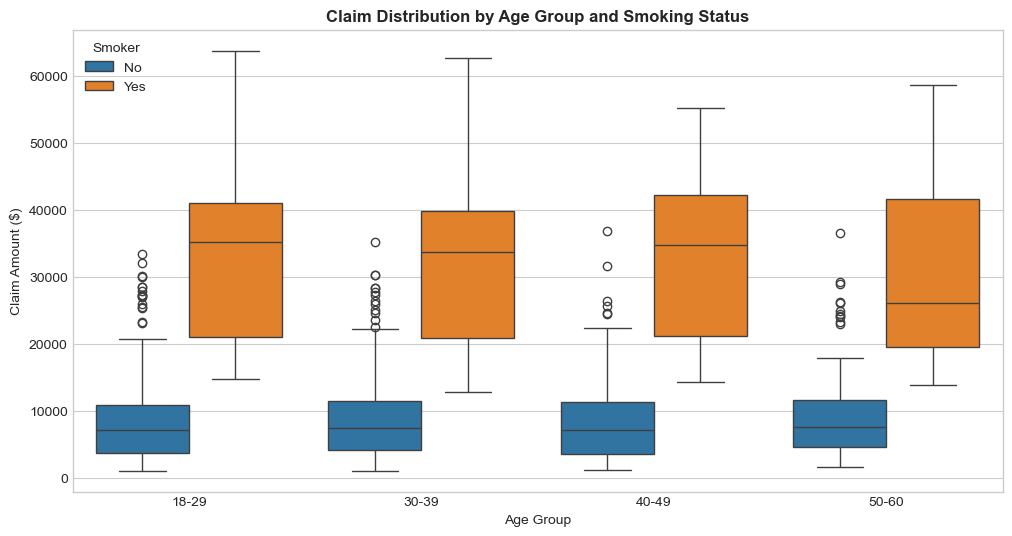

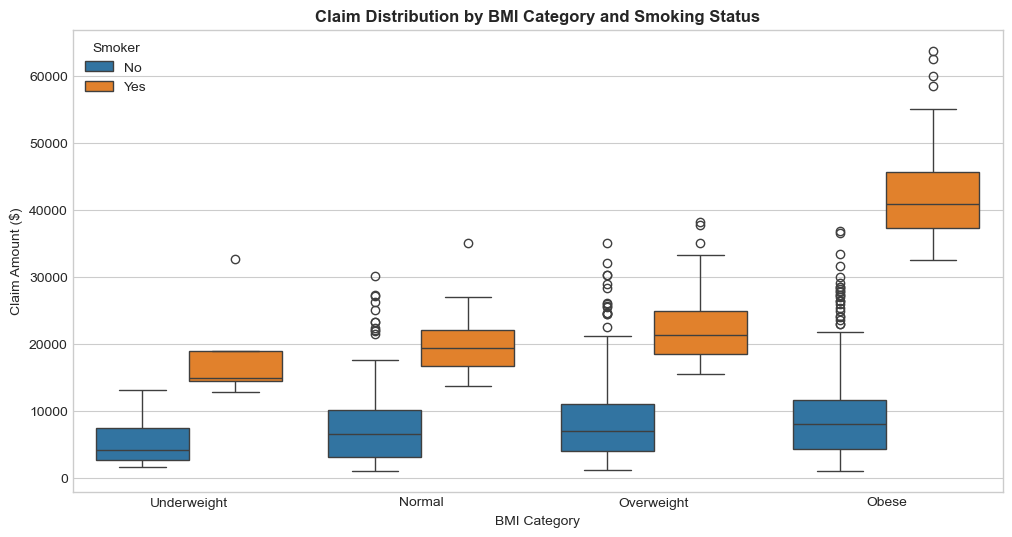

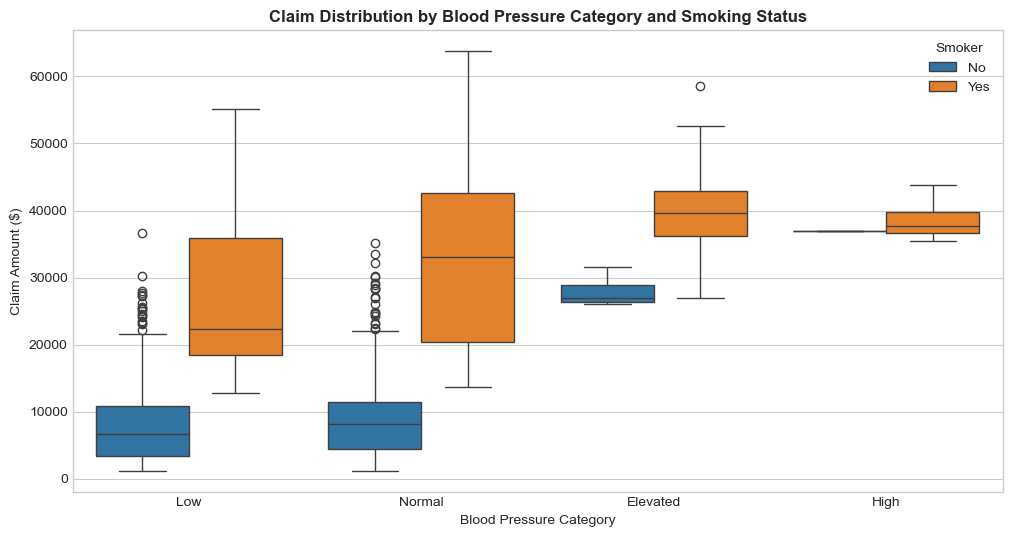

In [23]:
#GROUPED COMPARATIVE ADVANCED ANALYSIS

# Create BMI categories 0 to 18.5 → Underweight, to 25 → Normal, to 30 → Overweight, to 100 → Obese

df['bmi_category'] = pd.cut(df['bmi'], 
                            bins=[0, 18.5, 25, 30, 100],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

#Feature Engineering via Binning:

# Create Age groups
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 30, 40, 50, 60],
                         labels=['18-29', '30-39', '40-49', '50-60'])

# Create Blood Pressure categories 0–89 → 'Low', 90–119 → 'Normal', 120–139 → 'Elevated', 140–200 → 'High'
df['bp_category'] = pd.cut(df['bloodpressure'],
                           bins=[0, 89, 119, 139, 200],
                           labels=['Low', 'Normal', 'Elevated', 'High'])

# Plot: Claim vs Age Group & Smoker
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='age_group', y='claim', hue='smoker')
plt.title('Claim Distribution by Age Group and Smoking Status', weight='bold')
plt.ylabel('Claim Amount ($)')
plt.xlabel('Age Group')
plt.legend(title='Smoker')
plt.show()

# Plot: Claim vs BMI Category & Smoker
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='bmi_category', y='claim', hue='smoker')
plt.title('Claim Distribution by BMI Category and Smoking Status', weight='bold')
plt.ylabel('Claim Amount ($)')
plt.xlabel('BMI Category')
plt.legend(title='Smoker')
plt.show()

# Plot: Claim vs Blood Pressure Category & Smoker
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='bp_category', y='claim', hue='smoker')
plt.title('Claim Distribution by Blood Pressure Category and Smoking Status', weight='bold')
plt.ylabel('Claim Amount ($)')
plt.xlabel('Blood Pressure Category')
plt.legend(title='Smoker')
plt.show()

### <font color='darkblue'> **Observation:**</font>

<font color='darkblue'>1) Smoking is the most significant factor driving higher claim amounts across all analyzed categorical variables (Age, BMI, blood pressure). 
    
<font color='darkblue'>2) Claim amounts slightly increase with age (e.g., higher claims for 50-60 vs. 18-29) , reflecting higher healthcare costs for older individuals though not significant.   
    
<font color='darkblue'>3) Smokers' claims show different patterns depending on their BMI and blood pressure. There appears to be a higher claims for smokers when combined with other health indicators like high BMI/Bloodpressure, leading to exceptionally high claim amounts for obese smokers and elevated-high BP smokers.

### 12. SUMMARY OF EDA FINDINGS

<font color='darkblue'>1) Smoking is the top factor driving higher claims amount.
    
<font color='darkblue'>2) Bloodpressure has show significant (moderate correlation, r=0.53) but smaller effects on claims as compared to smoking.
    
<font color='darkblue'>3) Very weak correlation between region and claims.
    
<font color='darkblue'>4) Weak correlation between BMI and claims amount. However for smokers, extreme BMI values (>30 - Obese) have very high claims amount.
    
<font color='darkblue'>5) Very weak correlation between age and claims.
    
<font color='darkblue'>6) Very weak correlation between Patient Dependant (children) and claims.
    
<font color='darkblue'>7) Data quality is good with minimal missing values.

## Part 2. Modeling with Linear Regression, Random Forest Regression, and Gradient    Boosting Regression

### 13. IMPORTS ESSENTIAL TOOLS AND PREPARATION FOR MODELING

### <font color='darkblue'>**The tools used for this program were:-**</font>

<font color='darkblue'>1) Gradient Boosting Regressor for regression that builds trees sequentially to correct errors from previous ones.
    
<font color='darkblue'>2) StandardScaler to standardizes numerical features (mean=0, variance=1) for consistent scaling.
    
<font color='darkblue'>3) OneHotEncoder to converts categorical features into binary columns (e.g., "Male/Female" → [1,0] or [0,1]).
    
<font color='darkblue'>4) ColumnTransformer to apply different transformations (e.g., scaling, encoding) to specific columns in one step.

<font color='darkblue'>5) Pipeline for chains preprocessing and modeling steps together to avoid data leaks and simplify workflows.

In [44]:
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Separate features and target
X = df.drop(['claim', 'index', 'PatientID'], axis=1)
y = df['claim']

# Define categorical and numerical features
categorical_cols = ['gender', 'diabetic', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'bloodpressure', 'Patient Dependant_Children']

# Define transformers
#This pipeline uses StandardScaler to standardize numerical data. 
#It adjusts features so they have a mean of 0 and a standard deviation of 1. 
#This is important for many machine learning models that are sensitive to the scale of the data.
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

#This pipeline uses OneHotEncoder to handle categorical data. 
#It converts text or labels into a numerical format that machine learning models can understand by creating new binary columns for each unique category.
#Handle_unknown='ignore' ensures the model doesn't fail if it encounters a new, unseen category during prediction.
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine them into a ColumnTransformer
#This tool applies different data transformations to specific columns of a dataset:
#1)It applies the numeric_transformer (standardizing data) to all columns listed in numerical_cols
#2)It applies the categorical_transformer (one-hot encoding) to all columns listed in categorical_cols
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 14. Linear Regression


                            LINEAR REGRESSION MODEL                             

MSE: 42755486.03
MAE: 4891.71
R²: 0.7398

Most Significant Coefficients:
--------------------------------------------------------------------------------
                   Feature Coefficient ($)                       Impact
                smoker_Yes      $10,032.01 Increases cost by $10,032.01
             bloodpressure       $2,746.33  Increases cost by $2,746.33
                       bmi       $1,968.06  Increases cost by $1,968.06
          region_northeast       $1,758.33  Increases cost by $1,758.33
Patient Dependant_Children       $1,122.78  Increases cost by $1,122.78
          region_southeast      $-1,060.08  Decreases cost by $1,060.08
          region_southwest        $-563.23    Decreases cost by $563.23
              diabetic_Yes        $-199.25    Decreases cost by $199.25
          region_northwest        $-135.02    Decreases cost by $135.02
                       age         $101.74 

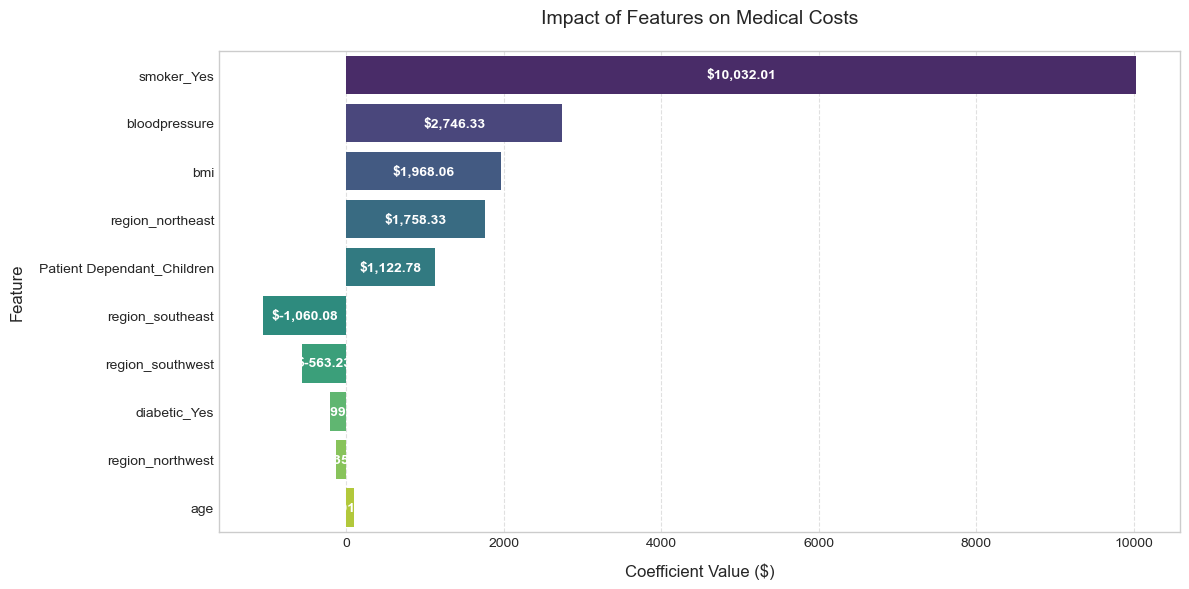

In [25]:
# Linear Regression Model
print("\n" + "="*80)
print("LINEAR REGRESSION MODEL".center(80))
print("="*80)

# Model pipeline
lr_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train and predict
lr_pipe.fit(X_train, y_train)
y_pred_lr = lr_pipe.predict(X_test)

# Evaluate metrics
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

# Display metrics
print(f"\nMSE: {lr_mse:.2f}")
print(f"MAE: {lr_mae:.2f}")
print(f"R²: {lr_r2:.4f}\n")

# Get coefficients (for interpretation)
lr_coefs = pd.DataFrame({
    'Feature': numerical_cols + list(lr_pipe.named_steps['preprocessor']
                .named_transformers_['cat']
                .named_steps['onehot']
                .get_feature_names_out(categorical_cols)),
    'Coefficient': lr_pipe.named_steps['regressor'].coef_
}).sort_values('Coefficient', key=abs, ascending=False)

# Filter out negative categories and irrelevant features
lr_coefs_filtered = lr_coefs[
    (~lr_coefs['Feature'].str.contains('_No')) & 
    (~lr_coefs['Feature'].str.contains('gender_'))
].head(10).copy()

# Format coefficients as dollars and add interpretation
lr_coefs_filtered['Coefficient ($)'] = lr_coefs_filtered['Coefficient'].apply(lambda x: f"${x:,.2f}")
lr_coefs_filtered['Impact'] = lr_coefs_filtered['Coefficient'].apply(
    lambda x: f"Increases cost by ${abs(x):,.2f}" if x > 0 else f"Decreases cost by ${abs(x):,.2f}"
)

# Display coefficients table
print("Most Significant Coefficients:")
print("-"*80)
print(lr_coefs_filtered[['Feature', 'Coefficient ($)', 'Impact']].to_string(index=False))
print("-"*80)

# INTERPRETATION GUIDE
print("\n" + "="*80)
print("INTERPRETATION GUIDE".center(80))
print("="*80)
print("All dollar amounts represent ANNUAL impact on insurance claims:")
print("- For continuous features (age, bloodpressure, bmi): Impact per unit increase after baseline where applicable")
print("- For binary features (smoker_Yes): Impact vs. reference category")
print("- Negative values indicate cost reductions")
print("="*80 + "\n")

# Plot important coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=lr_coefs_filtered, palette='viridis')
plt.title('Impact of Features on Medical Costs', pad=20, fontsize=14)
plt.xlabel('Coefficient Value ($)', fontsize=12, labelpad=10)
plt.ylabel('Feature', fontsize=12, labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add value labels to bars
for i, (coef, feature) in enumerate(zip(lr_coefs_filtered['Coefficient'], lr_coefs_filtered['Feature'])):
    plt.text(coef/2, i, f"${coef:,.2f}", va='center', ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

### <font color='darkblue'> **Interpretation:**</font>

<font color='darkblue'>1) R² (0.7398): The model explains 73.98% of the variance in medical costs. 
    
<font color='darkblue'> For real-world healthcare data, where R² > 0.6 is often considered good due to inherent unpredictability in human health.   
    
R² tells us how well the model’s predictions match the actual results. The closer it is to 1, the better the model explains what’s happening in the data (1 means a perfect fit).
    
<font color='darkblue'>2) MAE (4,891.71): Predictions are off by ±$4,892 on average.

Mean Absolute Error tells you on average, how much your predictions are off.

<font color='darkblue'>3) MSE (42.76M): Large value suggests occasional extreme errors (squared penalty).

Mean Squared Error tells you on average, the squared difference between your predictions and the actual values is this amount.

<font color='darkblue'>4) Smoker, Bloodpressure and BMI is the top three cost drivers

### <font color='darkblue'> **Impact on Medical Cost ($):**</font>

<font color='darkblue'>5) Impact: Smokers incur $10,032 higher annual costs compared to non-smokers.
    
<font color='darkblue'>6) Impact: Each unit increase in blood pressure adds 2,746/year, and each BMI unit adds 1,968/year from baseline.
    
<font color='darkblue'>7) Example calculation: If a policyholder has;

BMI = 32 (vs. baseline 25): 7 × $1,968 = +13,776/year.

Blood Pressure = 140 mmHg (vs. 120): 20 × $2,746 = +$54,920/year.

Total Added Cost = $68,696/year.

Use these values for considerations on premiums setting or target interventions.
    
<font color='red'>*Note: Baseline figs may determine from earlier analysis (12. Advanced Analysis & etc) or national guidelines. 

<font color='red'>Examples: Set baseline for BMI at 25 onwards (Overweight) or 30 onwards (Obese) and Bloodpressure 120 onwards (Elevated) or 140 onwards (High).

### 15. Random Forest Regression


RANDOM FOREST REGRESSION MODEL

MSE: 29484920.62
MAE: $4046.59
R²: 0.8205

Most Significant Features (Annual Impact):
----------------------------------------
          smoker_Yes    $4,681.07 Increases cost by $4,681.07
                 bmi    $2,975.61 Increases cost by $2,975.61
       bloodpressure    $1,212.10 Increases cost by $1,212.10
                 age    $649.18 Increases cost by $649.18
Patient Dependant_Children    $258.79 Increases cost by $258.79
    region_northeast    $141.15 Increases cost by $141.15
    region_northwest    $81.58 Increases cost by $81.58
    region_southwest    $66.48 Increases cost by $66.48
    region_southeast    $66.18 Increases cost by $66.18
        diabetic_Yes    $52.01 Increases cost by $52.01

                              INTERPRETATION GUIDE                              
All dollar amounts represent ANNUAL impact on insurance claims:
- For continuous features (age, bloodpressure, bmi): Impact per unit increase after baseline where appli

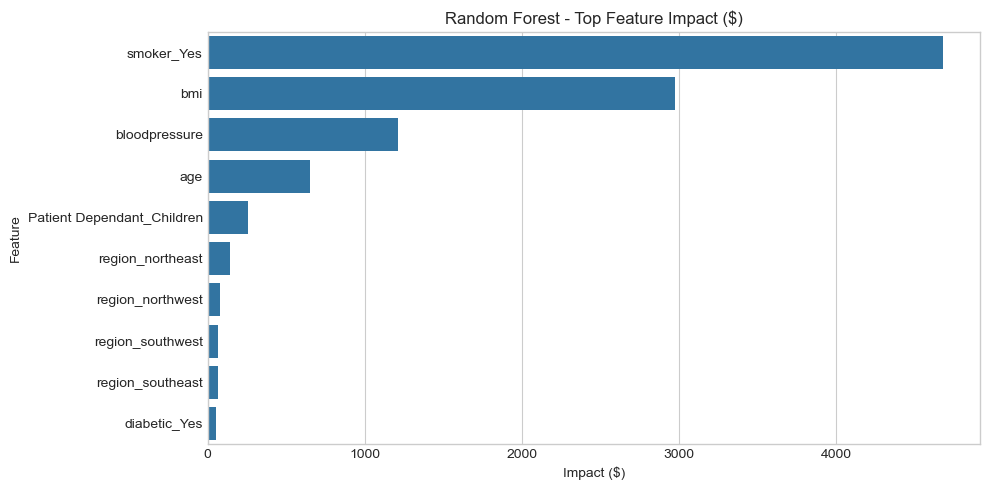

In [26]:
# Random Forest Model
print("\n" + "="*50)
print("RANDOM FOREST REGRESSION MODEL")
print("="*50)

# Model pipeline
rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train and predict
rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_pipe.predict(X_test)

# Evaluate metrics
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Display metrics (with $ for MAE)
print(f"\nMSE: {rf_mse:.2f}")
print(f"MAE: ${rf_mae:.2f}")  # Added dollar sign
print(f"R²: {rf_r2:.4f}")

# Get feature importance
rf_importances = pd.DataFrame({
    'Feature': numerical_cols + list(rf_pipe.named_steps['preprocessor']
                .named_transformers_['cat']
                .named_steps['onehot']
                .get_feature_names_out(categorical_cols)),
    'Importance': rf_pipe.named_steps['regressor'].feature_importances_
}).sort_values('Importance', ascending=False)

# Filter out negative categories
rf_importances_filtered = rf_importances[
    (~rf_importances['Feature'].str.contains('_No')) & 
    (~rf_importances['Feature'].str.contains('gender_'))
].head(10)

# --- NEW: Convert importance to dollar impact ---
# Scale importances to match mean prediction (monetary impact)
mean_prediction = np.mean(y_pred_rf)
rf_importances_filtered['Impact ($)'] = rf_importances_filtered['Importance'] * mean_prediction

# Display top features with dollar impact
print("\nMost Significant Features (Annual Impact):")
print("----------------------------------------")
for _, row in rf_importances_filtered.iterrows():
    impact = row['Impact ($)']
    direction = "Increases" if impact > 0 else "Decreases"
    print(f"{row['Feature']:>20}    ${abs(impact):,.2f} {direction} cost by ${abs(impact):,.2f}")
    
# INTERPRETATION GUIDE
print("\n" + "="*80)
print("INTERPRETATION GUIDE".center(80))
print("="*80)
print("All dollar amounts represent ANNUAL impact on insurance claims:")
print("- For continuous features (age, bloodpressure, bmi): Impact per unit increase after baseline where applicable")
print("- For binary features (smoker_Yes): Impact vs. reference category")
print("- Negative values indicate cost reductions")
print("="*80 + "\n")
    
# Plot feature importance (in $)
plt.figure(figsize=(10, 5))
sns.barplot(x='Impact ($)', y='Feature', data=rf_importances_filtered)
plt.title('Random Forest - Top Feature Impact ($)')
plt.tight_layout()
plt.show()

### <font color='darkblue'> **Interpretation:**</font>

<font color='darkblue'>1) R² (0.8205): The model explains 82.05% of the variance in medical costs. 
    
<font color='darkblue'> For real-world healthcare data, where R² > 0.6 is often considered good due to inherent unpredictability in human health.   
    
R² tells us how well the model’s predictions match the actual results. The closer it is to 1, the better the model explains what’s happening in the data (1 means a perfect fit).
    
<font color='darkblue'>2) MAE (4,046.59): On average, Random Forest model's predictions for medical costs are off by $4,046.59.

Mean Absolute Error tells you on average, how much your predictions are off.

<font color='darkblue'>3) MSE (29.5M)

Mean Squared Error tells you on average, the squared difference between your predictions and the actual values is this amount.

<font color='darkblue'>4) Smoker, BMI and Bloodpressure is the top three cost drivers

### <font color='darkblue'> **Impact on Medical Cost ($):**</font>

<font color='darkblue'>5) Impact: Smokers incur $4,681 higher annual costs compared to non-smokers.
    
<font color='darkblue'>6) Impact: Each unit increase in blood pressure adds 1,212/year, and each BMI unit adds 2,975/year from baseline.

<font color='red'>*Note: Baseline figs may determine from earlier analysis (12. Advanced Analysis & etc) or national guidelines. 

<font color='red'>Examples: Set baseline for BMI at 25 onwards (Overweight) or 30 onwards (Obese) and Bloodpressure 120 onwards (Elevated) or 140 onwards (High).

### 16. Gradient Boosting Regression


GRADIENT BOOSTING MODEL

Performance Metrics:
Mean Squared Error: $24,903,148.62
Mean Absolute Error: $3,676.70
R² Score: 0.8484

Top Features by Dollar Impact:
                   Feature Dollar_Impact_Formatted
                smoker_Yes               $5,600.97
                       bmi               $2,563.82
             bloodpressure                 $906.29
                       age                 $192.20
          region_northeast                 $140.72
Patient Dependant_Children                 $133.49
          region_northwest                  $14.78
          region_southeast                  $14.19
              diabetic_Yes                   $9.53
          region_southwest                   $8.42

                              INTERPRETATION GUIDE                              
All dollar amounts represent ANNUAL impact on insurance claims:
- For continuous features (age, bloodpressure, bmi): Impact per unit increase after baseline
- For binary features (smoker_Yes): Im

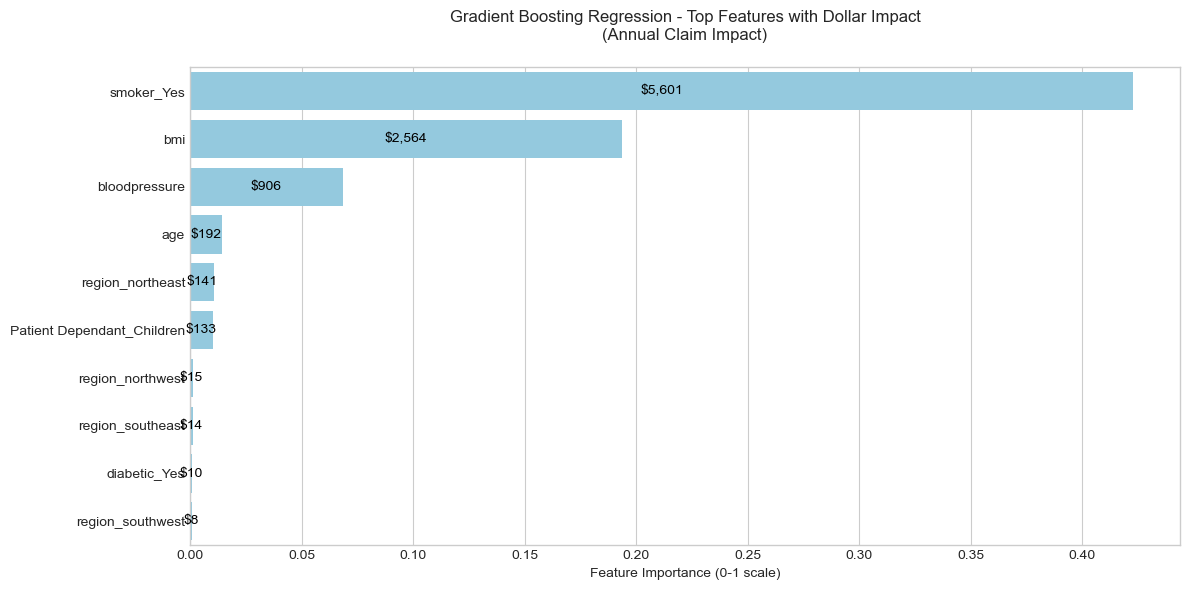


Business Interpretation:
- Average claim amount: $13,252.75
- Top feature 'smoker_Yes' impacts claims by ~$5,601 annually
- Smokers (smoker_Yes) increase claims by ~$5,601 on average


In [27]:
# Gradient Boosting Model
print("\n" + "="*50)
print("GRADIENT BOOSTING MODEL")
print("="*50)

# Model pipeline
gb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

# Train and predict
gb_pipe.fit(X_train, y_train)
y_pred_gb = gb_pipe.predict(X_test)

# Evaluate metrics with dollar formatting
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

# Display metrics with dollar values
print("\nPerformance Metrics:")
print(f"Mean Squared Error: ${gb_mse:,.2f}")
print(f"Mean Absolute Error: ${gb_mae:,.2f}")  # Most interpretable in dollars
print(f"R² Score: {gb_r2:.4f}")

# Calculate dollar impact of top features
avg_claim = y.mean()
gb_importances = pd.DataFrame({
    'Feature': numerical_cols + list(gb_pipe.named_steps['preprocessor']
                .named_transformers_['cat']
                .named_steps['onehot']
                .get_feature_names_out(categorical_cols)),
    'Importance': gb_pipe.named_steps['regressor'].feature_importances_,
    'Dollar_Impact': gb_pipe.named_steps['regressor'].feature_importances_ * avg_claim
}).sort_values('Dollar_Impact', ascending=False)

# Filter and format for display
gb_importances_filtered = gb_importances[
    (~gb_importances['Feature'].str.contains('_No')) & 
    (~gb_importances['Feature'].str.contains('gender_'))
].head(10).copy()

# Format dollar impact
gb_importances_filtered['Dollar_Impact_Formatted'] = gb_importances_filtered['Dollar_Impact'].apply(
    lambda x: f"${x:,.2f}"
)

print("\nTop Features by Dollar Impact:")
print(gb_importances_filtered[['Feature', 'Dollar_Impact_Formatted']].to_string(index=False))

# Dual-axis plot showing both importance and dollar impact
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Importance', y='Feature', data=gb_importances_filtered, color='skyblue')

# Add dollar values to bars
for i, (_, row) in enumerate(gb_importances_filtered.iterrows()):
    ax.text(row['Importance']/2, i, 
            f"${row['Dollar_Impact']:,.0f}", 
            va='center', ha='center', color='black', fontsize=10)
    
# INTERPRETATION GUIDE
print("\n" + "="*80)
print("INTERPRETATION GUIDE".center(80))
print("="*80)
print("All dollar amounts represent ANNUAL impact on insurance claims:")
print("- For continuous features (age, bloodpressure, bmi): Impact per unit increase after baseline")
print("- For binary features (smoker_Yes): Impact vs. reference category")
print("- Negative values indicate cost reductions")
print("="*80 + "\n")

plt.title('Gradient Boosting Regression - Top Features with Dollar Impact\n(Annual Claim Impact)', pad=20)
plt.xlabel('Feature Importance (0-1 scale)')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Additional business metrics
print(f"\nBusiness Interpretation:")
print(f"- Average claim amount: ${avg_claim:,.2f}")
print(f"- Top feature '{gb_importances_filtered.iloc[0]['Feature']}' impacts claims by ~${gb_importances_filtered.iloc[0]['Dollar_Impact']:,.0f} annually")
print(f"- Smokers (smoker_Yes) increase claims by ~${gb_importances_filtered[gb_importances_filtered['Feature'] == 'smoker_Yes']['Dollar_Impact'].values[0]:,.0f} on average")

### <font color='darkblue'> **Interpretation:**</font>

<font color='darkblue'>1) R² (0.8484): The model explains 84.84% of the variance in medical costs. 
    
<font color='darkblue'> For real-world healthcare data, where R² > 0.6 is often considered good due to inherent unpredictability in human health.   
    
R² tells us how well the model’s predictions match the actual results. The closer it is to 1, the better the model explains what’s happening in the data (1 means a perfect fit).
    
<font color='darkblue'>2) MAE (3,676.70): On average, Gradient Boosting model's predictions for medical costs are off by $3,676.70.

Mean Absolute Error tells you on average, how much your predictions are off.

<font color='darkblue'>3) MSE (24.9M)

Mean Squared Error tells you on average, the squared difference between your predictions and the actual values is this amount.

<font color='darkblue'>4) Smoker, BMI and Bloodpressure is the top three cost drivers

### <font color='darkblue'> **Impact on Medical Cost ($):**</font>

<font color='darkblue'>5) Impact: Smokers incur $5,601 higher annual costs compared to non-smokers.
    
<font color='darkblue'>6) Impact: Each unit increase in blood pressure adds 906/year, and each BMI unit adds 2,564/year from baseline.

<font color='darkblue'>7) Example calculation: If a policyholder has;

BMI = 32 (vs. baseline 25): 7 × $2,563 = +$17,941/year.

Blood Pressure = 140 mmHg (vs. 120): 20 × $906 = +$18,120/year.

Total Added Cost = $36,061/year.

Use these values for considerations on premiums setting or target interventions.
    
<font color='red'>*Note: Baseline figs may determine from earlier analysis (12. Advanced Analysis & etc) or national guidelines. 

<font color='red'>Examples: Set baseline for BMI at 25 onwards (Overweight) or 30 onwards (Obese) and Bloodpressure 120 onwards (Elevated) or 140 onwards (High).

### 17. Models Comparison 

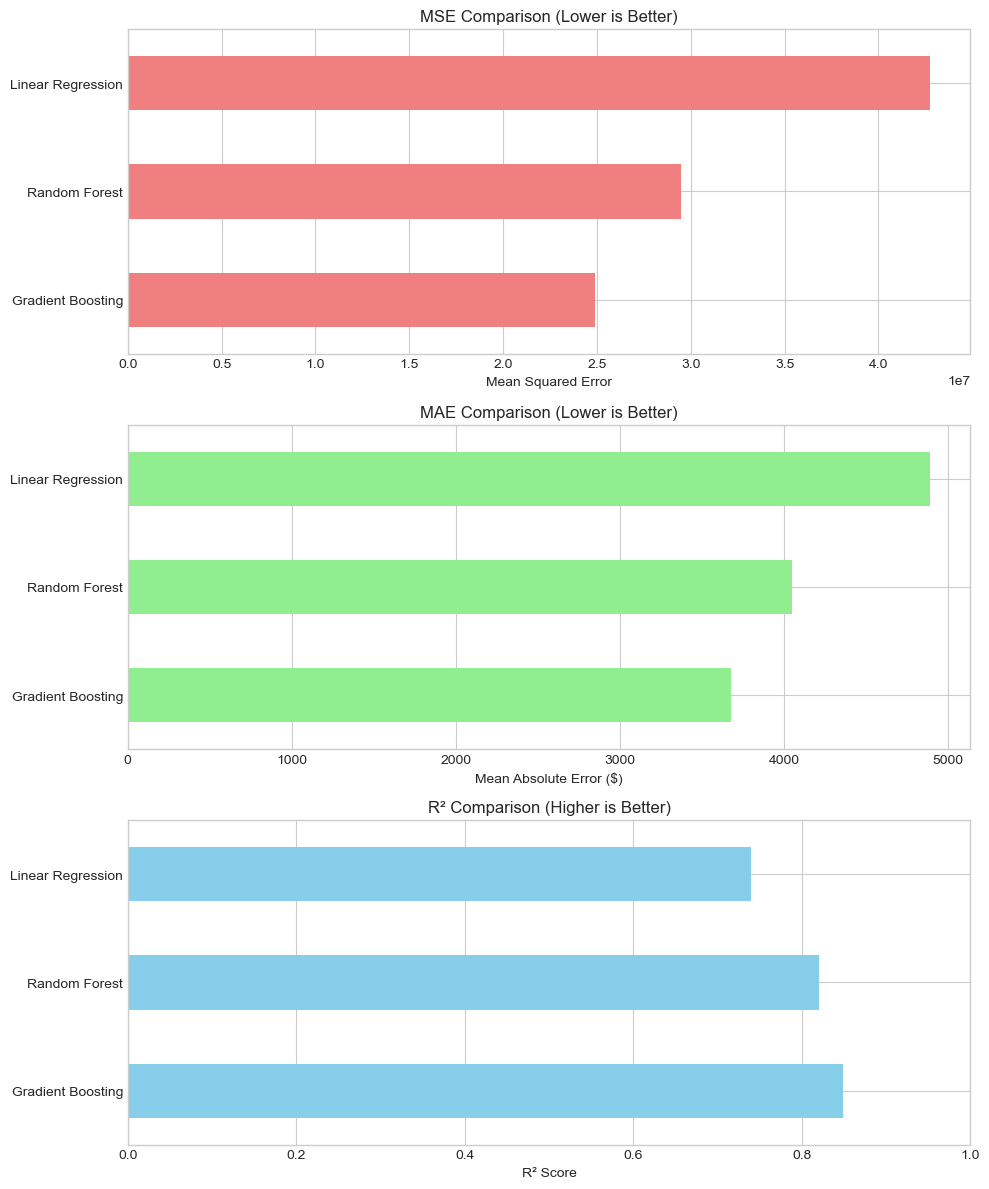

In [28]:
# Comparison of all models
metrics_df = pd.DataFrame({
    'Linear Regression': [lr_mse, lr_mae, lr_r2],
    'Random Forest': [rf_mse, rf_mae, rf_r2],
    'Gradient Boosting': [gb_mse, gb_mae, gb_r2]
}, index=['MSE', 'MAE', 'R2'])

# Plot comparison
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

metrics_df.loc['MSE'].sort_values().plot(kind='barh', ax=axes[0], color='lightcoral')
axes[0].set_title('MSE Comparison (Lower is Better)')
axes[0].set_xlabel('Mean Squared Error')

metrics_df.loc['MAE'].sort_values().plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_title('MAE Comparison (Lower is Better)')
axes[1].set_xlabel('Mean Absolute Error ($)')

metrics_df.loc['R2'].sort_values(ascending=False).plot(kind='barh', ax=axes[2], color='skyblue')
axes[2].set_title('R² Comparison (Higher is Better)')
axes[2].set_xlabel('R² Score')
axes[2].set_xlim(0, 1)

plt.tight_layout()
plt.show()

### 18. SUMMARY OF MODELING FINDINGS - GRADIENT BOOSTING (Best Performer)

<font color='darkblue'>1) The Linear Regression model explains 73.98% of the variance in medical costs (R²), with an average prediction error (MAE) of $4,891.71. Smokers, blood pressure, and BMI are identified as the top three cost drivers in this model.


<font color='darkblue'>2) The Random Forest model shows improved performance, explaining 82.05% of the variance (R²) with an MAE of $4,046.59. Similar to Linear Regression, smoker status, BMI, and blood pressure are the most significant cost drivers.


<font color='darkblue'>3) The Gradient Boosting model is presented as the best performer, explaining 84.84% of the variance (R²) with the lowest MAE of $3,676.70. Again, smoker status, BMI, and blood pressure are highlighted as the top three cost drivers. 

<font color='darkblue'>4) All models confirmed smoking as the highest risk factor. Gradient Boosting was selected as the best model for its accuracy and interpretability, aiding premium pricing and interventions. Visualizations compared metrics and feature impacts.

### 19. OVERALL SUMMARY

<font color='darkblue'>The project aimed to predict health insurance claim amounts to enhance risk assessment and pricing strategies. It involved exploratory data analysis (EDA) to understand key drivers, followed by developing and comparing predictive models (Linear Regression, Random Forest Regression, and Gradient Boosting Regression). The analysis revealed that smoking, BMI, and blood pressure are the most significant factors influencing claim costs.

### 20. KEY INSIGHTS

<font color='darkblue'>1) Smoking is the strongest predictor of higher claims across all models.

<font color='darkblue'>2) BMI and blood pressure are strong continuous cost drivers. Every unit increase in BMI correlates with thousands of dollars in added annual claim burden.

<font color='darkblue'>3) Gradient Boosting outperformed all other models (R² = 0.8484), suggesting that non-linear interactions between features are important to accurately predicting claims.

### 21. RECOMMENDATION

<font color='darkblue'>1) Adopt the Gradient Boosting model for deployment in pricing strategies and risk evaluation.

<font color='darkblue'>2) Target high-risk factors like smoking, obesity and High Blood Pressure through preventive healthcare incentives.

<font color='darkblue'>3) Regularly retrain models to reflect changing health trends and maintain predictive power.

### 22. OTHERS COMMENTS

<font color='darkblue'>1) This dataset is good for prototyping risk-based pricing models for health insurance.

<font color='darkblue'>2) Future enhancements could include:

- Time-series claim history

- Medication use

- Hospital visits or diagnoses

<font color='red'>3) Ethical consideration: Predictive models in healthcare must be validated against bias and fairness, especially when used in pricing or coverage decisions that align with country-specific healthcare policies/laws and guildlines.

<font color='red'>4) Pricing strategies should account for country-specific healthcare policies and subsidies (If any), as these were not explicitly detailed in the dataset.